In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from collections import Counter
import re


In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller


In [3]:
df=pd.read_csv('/Users/vallirajasekar/Desktop/NLP_PROJECT/Fake_News/Fake_News_Classifier_Basic/WELFake_Dataset.csv')

In [4]:
df.shape

(72134, 4)

In [5]:
df.dropna(inplace=True)

In [6]:
df=df.sample(n=10,)

In [7]:
df['combined_text_title']=df['title']+df['text']

In [8]:
df.drop(['Unnamed: 0','title','text'],axis=1,inplace=True)

In [9]:
df.shape

(10, 2)

In [10]:
df

,label,combined_text_title
65981,0,Chance of 'no deal' Brexit rises to 1-in-4: JP...
58315,1,"They Said What?!: Find Out What Reba McEntire,..."
3427,1,Milo Might Have Gone Too Far This Time – Even...
5009,1,Laverne Cox Tears Trans Hate To SHREDS In Pas...
62608,0,Clinton's 'girl power' push wins over women in...
24847,0,Trump discusses concern over Qatar dispute wit...
437,1,Readings in the Jewish Zionist Control of the ...
65785,0,Singapore academic who warned of perils of sma...
44965,0,"Scotland, Wales and London want special Brexit..."
9788,1,FBI PANIC! Hillary LIES In First Press Confere...


## Visualisation using Word Cloud

## Word Cloud for Real News

In [11]:
from wordcloud import WordCloud,STOPWORDS

In [12]:
df_cust_real=df[df['label']==1]['combined_text_title']

In [13]:
real_news=''.join(list(df_cust_real))

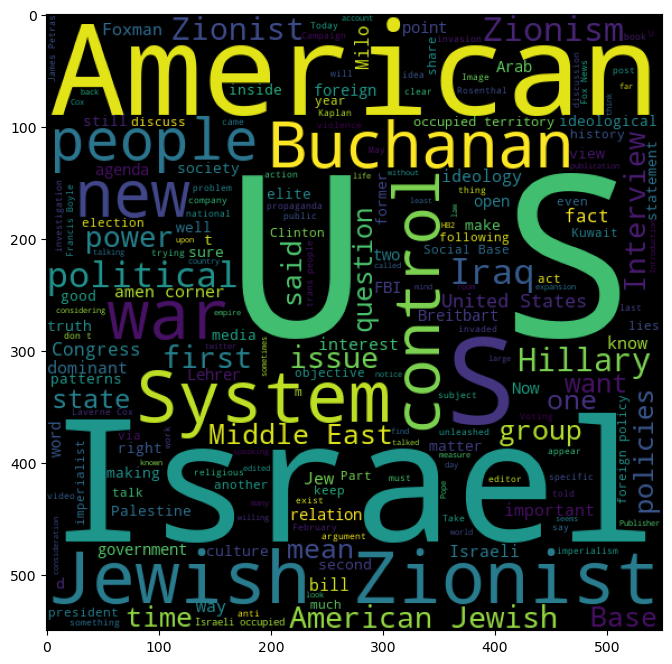

In [14]:
real_wc = WordCloud(width=550, height=550, stopwords=STOPWORDS).generate(real_news)

plt.figure(figsize=(10, 8)) 
plt.imshow(real_wc) 
plt.show()

#real_wc=WordCloud(width=550,height=550,).generate(real_news) plt.figure(figsize=(10,8)) plt.imshow(real_wc) plt.show()



## Word Cloud for Fake_News

In [15]:
df_cust_fake=df[df['label']==0]


In [16]:
fake_news=' '.join(list(df_cust_fake['combined_text_title']))

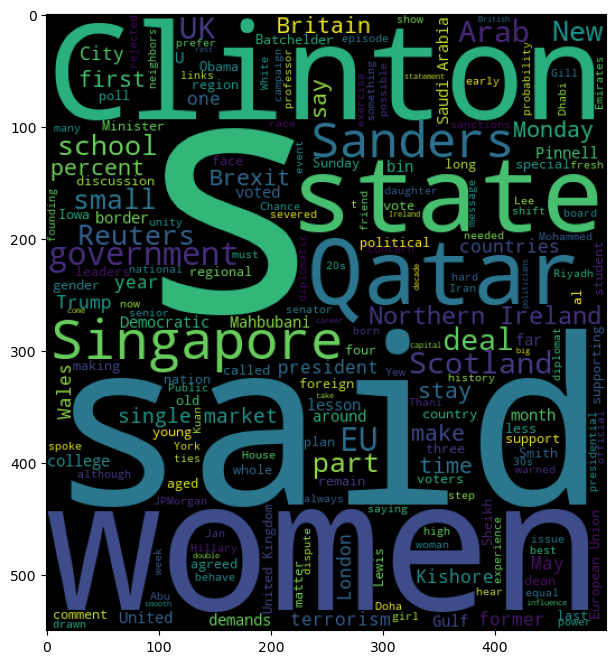

In [17]:
fake_wc=WordCloud(width=500,height=550,stopwords=STOPWORDS).generate(fake_news) 
plt.figure(figsize=(10,8)) 
plt.imshow(fake_wc) 
plt.show()



Preprocesing of the Data_Set
1.Lowering the Format

2.Tokenization

3.Remove Stop words

4.Remove Non Alphabetical letter/ Characters

5.Stemming/ Lemmetization

6,Spell Correction

In [18]:
lemmatizer = WordNetLemmatizer()
spell = Speller()
#spell=Speller()

In [19]:
data = []

for i in range(df.shape[0]):
    lines = df.iloc[i, 1]
    lines = re.sub('[^A-Za-z]', ' ', lines)   # Remove Punctuations
    lines = lines.lower()         # Lowering the Word
    lines = word_tokenize(lines)
    processed_word = []
    for i in lines:
        if i not in set(stopwords.words('english')):
            processed_word.append(spell(lemmatizer.lemmatize(i)))  # Use lemmatizer instead of stemming

    final_lines = ' '.join(processed_word)
    data.append(final_lines)


In [31]:
df['text']=pd.DataFrame(data)

In [37]:
df_1=pd.DataFrame(data)

In [25]:
y=df['label']

In [33]:
y

65981    0
58315    1
3427     1
5009     1
62608    0
24847    0
437      1
65785    0
44965    0
9788     1
Name: label, dtype: int64

In [46]:
df_1

,0
0,chance deal brexit rise jpmorganlondon reuters...
1,said find rea centre whoop goldberg pope franc...
2,mile might gone far time even breitbart detail...
3,tavern cox tear trans hate shred passionate po...
4,clinton girl power push win woman des mines io...
5,trump discus concern qatar dispute gulf arab s...
6,reading jewish pianist control united state in...
7,singapore academic warned peril small country ...
8,scotland male london want special brexit deal ...
9,fbi panic hillary lie first press conference l...


In [48]:
df.drop(['text'],axis=1,inplace=True)

In [58]:
df_new=pd.concat([df.reset_index(drop=True), df_1.reset_index(drop=True)], axis=1)

In [59]:
df_new

,label,combined_text_title,0
0,0,Chance of 'no deal' Brexit rises to 1-in-4: JP...,chance deal brexit rise jpmorganlondon reuters...
1,1,"They Said What?!: Find Out What Reba McEntire,...",said find rea centre whoop goldberg pope franc...
2,1,Milo Might Have Gone Too Far This Time – Even...,mile might gone far time even breitbart detail...
3,1,Laverne Cox Tears Trans Hate To SHREDS In Pas...,tavern cox tear trans hate shred passionate po...
4,0,Clinton's 'girl power' push wins over women in...,clinton girl power push win woman des mines io...
5,0,Trump discusses concern over Qatar dispute wit...,trump discus concern qatar dispute gulf arab s...
6,1,Readings in the Jewish Zionist Control of the ...,reading jewish pianist control united state in...
7,0,Singapore academic who warned of perils of sma...,singapore academic warned peril small country ...
8,0,"Scotland, Wales and London want special Brexit...",scotland male london want special brexit deal ...
9,1,FBI PANIC! Hillary LIES In First Press Confere...,fbi panic hillary lie first press conference l...


In [60]:
df

,label,combined_text_title
65981,0,Chance of 'no deal' Brexit rises to 1-in-4: JP...
58315,1,"They Said What?!: Find Out What Reba McEntire,..."
3427,1,Milo Might Have Gone Too Far This Time – Even...
5009,1,Laverne Cox Tears Trans Hate To SHREDS In Pas...
62608,0,Clinton's 'girl power' push wins over women in...
24847,0,Trump discusses concern over Qatar dispute wit...
437,1,Readings in the Jewish Zionist Control of the ...
65785,0,Singapore academic who warned of perils of sma...
44965,0,"Scotland, Wales and London want special Brexit..."
9788,1,FBI PANIC! Hillary LIES In First Press Confere...


In [62]:
pd.read_pickle('Fake_classifier_1000.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'Fake_classifier_1000.pkl'